# <center>《机器学习》随堂考
<center> 2020.6.3

说明：请将文件命名为 `随堂考_姓名.ipynb`,在下课(16:10)前发到 yzhang75@xmu.edu.cn

## 1. 请为本课程提些改进建议。

答：我觉得可以多增加一些编程的实例。本课程PPT的讲解已经很到位了，但是对于实操却会遇到很多问题，希望可以多一些作业/实力讲解。

## 2. 为什么深度学习在某些任务上表现亮眼，超过人类，而在另外一些任务上又表现笨拙？简要谈谈自己的理解。

答：我认为这是由计算机的特性决定的，在做一些复杂运算/大量机械性的重复运算时，计算机相比人类有很大的优势，但是深度学习算法本身是由人类编写的，人类对于自身的认知还远远不到位，目前做的只是一些简单的模仿，因此我认为算法会随着人类对自身认知的提高而进步，这个过程任重道远。

## 3. 用两种算法拟合如下训练集，然后在测试集上输出自己模型的预测结果，并计算误差。

说明：

- 不要改变训练集和测试集的参数

- 平方误差或均方根误差皆可。

- 结果尽量可视化

- 有必要的文字说明

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### 训练集

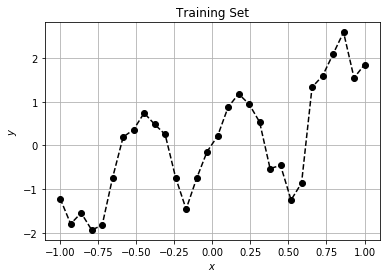

In [2]:
m=30 # 训练样本数
X_train = np.linspace(-1,1,m).reshape(m,1)
Y_train = 2*X_train*X_train*X_train+np.sin(10*X_train)+0.3*np.random.randn(m,1)
plt.plot(X_train,Y_train,'k--o');
plt.xlabel("$x$");
plt.ylabel("$y$");
plt.title("Training Set")
plt.grid(True)

#### 方法一，人工神经网络

在这里定义了人工神经网络

In [53]:
%%time
'''此栏中的ann算法适合于2及以上隐层，
而ANN算法适用于1~n个隐层'''

'''ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)'''

#定义sigmod函数
def sigmod(x):
    return 1/(1+np.exp(-x))

#先定义适合两个及以上隐藏层的ann算法
#ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ann(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    input_length=input_object.shape[0] #输入变量的行数
    input_width=input_object.shape[1] #输入变量的列数
    output_dimension=1 #输出层的数量
    X=input_object   
    y=target.reshape(-1,1)
    #定义第一个omega和最后一个omega
    Omega_input_to_hidlay=np.random.randn(input_width+1,hidden_layer_dimension)
    Omega_hidlay_to_out=np.random.randn(hidden_layer_dimension+1,output_dimension)
    
    n=hidden_layer_num  #隐藏层的数量
    m=hidden_layer_dimension #1个隐藏层的宽度
    #定义每两个隐藏层之间的omega
    Omega_between_hidlay=np.zeros((n-1,m+1,m))
    for i in range(n-1):
        Omega_between_hidlay[i]=np.random.randn(m+1,m)
    
    #设置绘图用的损失函数J，横坐标Jx，以及记录训练精度
    J=np.empty(n_iter)
    Jx=np.empty(n_iter)
    Accuracy=np.empty(n_iter)
    #开始训练
    for i in range(n_iter):
        #先计算a1与a11
        a1=X
        a11=np.insert(a1,0,values=1,axis=1)
        
        #定义ax及ax1
        hidden_layer_a=np.zeros((n,input_length,m))
        hidden_layer_a1=np.zeros((n,input_length,m+1))
        
        #定义Z2,3,...,n+1
        Z_of_hidlay=np.zeros((n,input_length,m))
        
        #计算Z2
        Z_of_hidlay[0]=np.dot(a11,Omega_input_to_hidlay)
        
        #计算a2及a21
        hidden_layer_a[0]=sigmod(Z_of_hidlay[0])
        hidden_layer_a1[0]=np.insert(hidden_layer_a[0],0,values=1,axis=1)
        
        #计算ax,ax1,Zx
        for j in range(1,n,1):
            Z_of_hidlay[j]=np.dot(hidden_layer_a1[j-1],Omega_between_hidlay[j-1])
            hidden_layer_a[j]=sigmod(Z_of_hidlay[j])
            hidden_layer_a1[j]=np.insert(hidden_layer_a[j],0,values=1,axis=1)
        
        #获得特征函数
        a_feature=hidden_layer_a[n-1]
        
        #计算输出层的Z与a
        Z_last=np.dot(hidden_layer_a1[n-1], Omega_hidlay_to_out)
        a_out=Z_last #最后一层的输出
        
        #计算cost function
        J[i]=np.dot((a_out-y).T,(a_out-y))/2/input_length
        Jx[i]=i
        
        #反向传播
        delta_last=a_out-y
        d_Omega_hidlay_to_out=np.dot(hidden_layer_a1[n-1].T,delta_last)
        
        delta_between_hidlay=np.zeros((n-1,input_length,m))
        delta_between_hidlay[n-2]=np.dot(delta_last,Omega_hidlay_to_out[1:,:].T)*(hidden_layer_a[n-1]*(1-hidden_layer_a[n-1]))
        d_Omega_between_hidlay=np.zeros((n-1,m+1,m))
        
        d_Omega_between_hidlay[n-2]=np.dot(hidden_layer_a1[n-2].T,delta_between_hidlay[n-2])
        
        for k in range(n-3,-1,-1):
            delta_between_hidlay[k]=np.dot(delta_between_hidlay[k+1],(Omega_between_hidlay[k+1])[1:,:].T)*(hidden_layer_a[k+1]*(1-hidden_layer_a[k+1]))
            d_Omega_between_hidlay[k]=np.dot(hidden_layer_a1[k].T, delta_between_hidlay[k])
            
        delta_first=np.dot(delta_between_hidlay[0],(Omega_between_hidlay[0])[1:,:].T)*(hidden_layer_a[0]*(1-hidden_layer_a[0]))
        d_Omega_input_to_hidlay=np.dot(a11.T,delta_first)
        
        #权重更新
        Omega_input_to_hidlay=Omega_input_to_hidlay-alpha*d_Omega_input_to_hidlay/input_length
        
        Omega_hidlay_to_out=Omega_hidlay_to_out-alpha*d_Omega_hidlay_to_out/input_length
        
        for q in range(n-1):
            Omega_between_hidlay[q]=Omega_between_hidlay[q]-alpha*d_Omega_between_hidlay[q]/input_length
    #返回值
    return Jx,J,a_out,a_feature

#定义适合1、2、3、......个隐藏层的ANN算法
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
def ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension):
    if hidden_layer_num==1:
        n_iter=n_iter
        alpha=alpha
        m=input_object.shape[0]
        input_dimension=input_object.shape[1]
        hidden_layer_1_dimension=hidden_layer_dimension
        output_dimension=1
        X=input_object
        y=target.reshape(-1,1)
        Omega1=np.random.randn(input_dimension+1,hidden_layer_1_dimension)
        Omega2=np.random.randn(hidden_layer_1_dimension+1,output_dimension)
        J_ann=np.empty(n_iter)
        Jx_ann=np.empty(n_iter)
        Accuracy_ann=np.empty(n_iter)
        #开始训练
        for i in np.arange(n_iter):
            #定义矩阵
            a1=X
            a11=np.insert(a1,0,values=1,axis=1)
            Z2=np.dot(a11,Omega1)
            a2=sigmod(Z2)
            a21=np.insert(a2,0,values=1,axis=1)
            Z3=np.dot(a21,Omega2)
            a3=Z3
            a_out_ann=a3
            #获得特征函数
            a_feature_ann=a2
            #计算cost function
            J_ann[i]=np.dot((a3-y).T,(a3-y))/2/m
            Jx_ann[i]=i
            #反向传播 Backpropagation
            delta3=a3-y
            d_Omega2=np.dot(a21.T,delta3)
            delta2=np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
            d_Omega1=np.dot(a11.T,delta2)
            #update weights
            Omega1=Omega1-alpha*d_Omega1/m
            Omega2=Omega2-alpha*d_Omega2/m
    else:
        Jx_ann,J_ann,a_out_ann,a_feature_ann=ann(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
    
    return Jx_ann,J_ann,a_out_ann,a_feature_ann
            


Wall time: 0 ns


#### 进行训练

由于训练集的非线性较强，为了更好拟合，再次采用了5层网络进行训练，隐含层宽度为50
即

`#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)`

`Jx_1,J_1,a_out_1,a_feature_1=ANN(X_train,Y_train,10000,0.1,5,50)`

In [19]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
Jx_1,J_1,a_out_1,a_feature_1=ANN(X_train,Y_train,10000,0.1,5,50)

#### 画出训练结果

The last lost function is  0.020340738350634293
Wall time: 24.9 ms


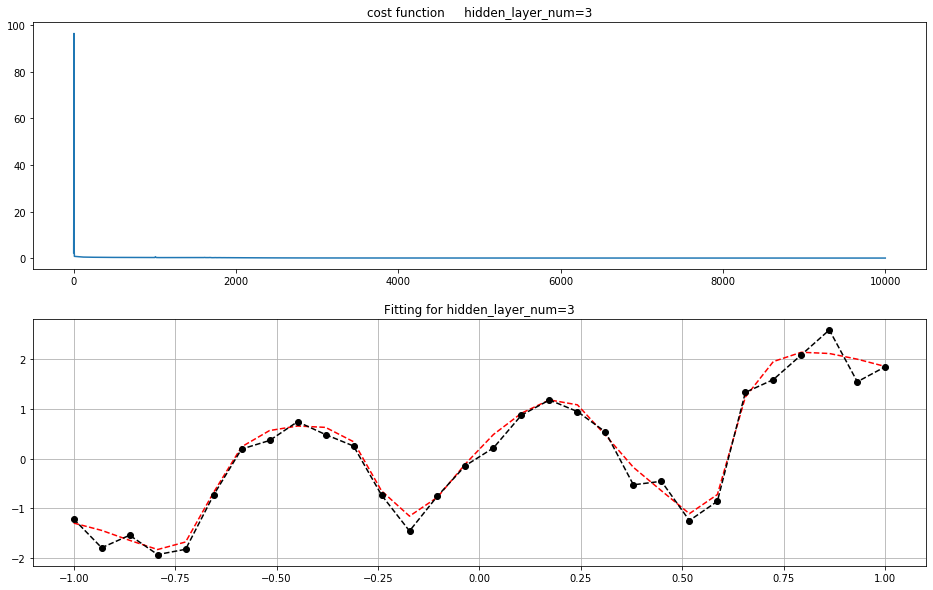

In [27]:
%%time
plt.figure(figsize=(16,10))
print("The last lost function is ",J_1[-1])

plt.subplot(211)
plt.plot(Jx_1,J_1)
plt.title("cost function"+"     "+"hidden_layer_num=3")

plt.subplot(212)
plt.title("Fitting for hidden_layer_num=3")
plt.plot(X_train,a_out_1,'r--')
plt.plot(X_train,Y_train,'k--o')
plt.grid(True)

由上图可见，拟合效果还可以，但并不完美。

#### 方法二，Normal Equation

接下来我们采用Normal Equation方法进行拟合

先定义相关函数

In [30]:
def FeatureMapping(x,n): #x-->X    
    '''所谓Feature Mapping 就是把原来的x1,x2,x3转化  
    为[[ 1, x1, x1^2, x1^3,...,x1^n]
       [ 1, x2, x2^2, x2^3,...,x2^n]
       [ 1, x3, x3^2, x3^3,...,x3^n]
       [ 1, x4, x4^2, x4^3,...,x4^n]
       ...
       [ 1, xm, xm^2, xm^3,...,xm^n]]
       这种形式的矩阵（当然还有很多种Feature Mapping的形式，不仅限于此）
       '''
    '''
    定义幂函数特征项
    X--训练集的x项
    n--表示最高阶幂次
    输出：（m,n+1)的np.array
    '''
    XX=np.insert(x,0,values=1,axis=1)
    g=x
    for i in np.arange(n-1):
        g=g*x
        XX=np.column_stack((XX,g))
    return XX

def MSE(Y,Y_prediction):
    '''
    计算平均平方误差
    Mean Square Error
    '''
    n=Y.shape[0]
    YY=Y_prediction-Y
    Loss=np.dot(YY.T, YY)/n
    error=Loss.item()
    return error

def NormalEquation(x,y,n):
    '''
    线性模型的 Normal Equation
    '''
    X=FeatureMapping(x,n)
    C=np.dot(X.T,X)
    B=np.linalg.pinv(C) #伪逆 pinv(pseudoinverse) 求逆 inv
    D=np.dot(B, X.T)
    return np.dot(D,y)## 方法二，

def prediction(x,Theta):
    '''
    假设函数
    shape=X.shape[0] 样本数
    '''
    n=Theta.shape[0]
    X=FeatureMapping(x,n-1) 
    return np.dot(X,Theta)

#### 用normal equation进行训练

In [32]:
n=20      #这里是使用Normal Equation进行训练
str_n=str(n)

#训练
Theta_train_Norm=NormalEquation(X_train,Y_train,n)
y_prediction_train_Norm=prediction(X_train,Theta_train_Norm)
MSE_train_Norm=MSE(Y_train,y_prediction_train_Norm)


#### 画出训练结果

train mse: 0.034614


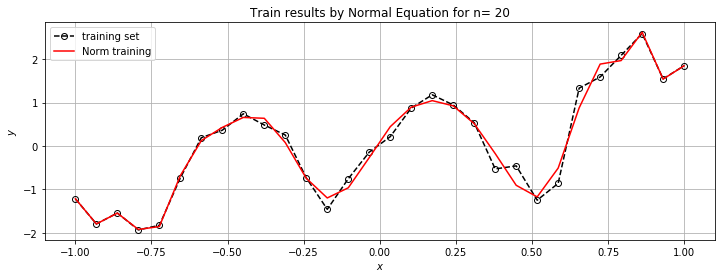

In [38]:
print("train mse:",'{:.6f}'.format(MSE_train_Norm))


plt.figure(figsize=(12,4))

plt.plot(X_train,Y_train,'k--o',markerfacecolor='none',label='training set'); 
plt.plot(X_train,y_prediction_train_Norm,'r',label='Norm training'); #画出学习结果
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title("Train results by Normal Equation for n= " + str_n);
plt.legend(loc='best')
plt.grid(True)



由上图可见，拟合效果相对于神经网络，有着肉眼可见的提高。

#### 利用sklearn的SGD算法进行训练

此外，还采用sklearn自带的SGD算法进行了训练。

In [49]:
import sys 
import io
from sklearn import linear_model

n=100

X=FeatureMapping(X_train,n)

X1=np.delete(X,0,axis=1) #no bias 

old_stdout=sys.stdout
sys.stdout=mystdout=io.StringIO()

clf=linear_model.SGDRegressor(max_iter=100000, tol=None,verbose=1,learning_rate='constant',eta0=0.01,alpha=0.)
clf.fit(X1,Y_train.ravel())

sys.stdout=old_stdout

loss_history=mystdout.getvalue()
J_train_SDG=[]
for line in loss_history.split('\n'):
    if(len(line.split("loss:"))==1):
        continue
    J_train_SDG.append(float(line.split("loss:")[-1]))

MSE of SGD: 0.27423102275709305


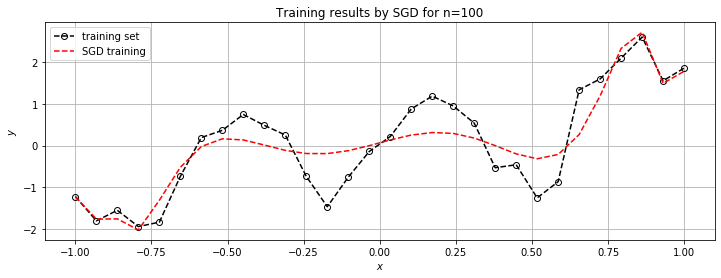

In [52]:
y_prediction_SGD=clf.predict(X1)
MSE_SGD=MSE(Y_train.ravel(),y_prediction_SGD)
print("MSE of SGD:",MSE_SGD)
plt.figure(figsize=(12,4))

plt.plot(X_train,Y_train,'k--o',markerfacecolor='none',label="training set")
plt.plot(X_train,y_prediction_SGD,'r--',label="SGD training")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
str_n=str(n)
plt.title("Training results by SGD for n="+str_n)
plt.legend(loc='best')
plt.grid(True)

由上图可见，训练效果对于这个非线性较强的函数差强人意。

接下来进行测试

============================================================================================================

### 测试集

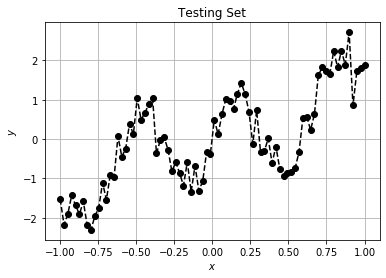

In [21]:
m_test=80 # 测试样本数
X_test = np.linspace(-1,1,m_test).reshape(m_test,1)
Y_test = 2*X_test*X_test*X_test+np.sin(10*X_test)+0.3*np.random.randn(m_test,1)
plt.plot(X_test,Y_test,'k--o');
plt.xlabel("$x$");
plt.ylabel("$y$");
plt.title("Testing Set")
plt.grid(True)

#### 用神经网络进行测试

In [22]:
#ANN(input_object,target,n_iter,alpha,hidden_layer_num,hidden_layer_dimension)
#ANN(坐标变量、y值，训练次数，学习率，隐藏层数，隐藏层宽度)
Jx_2,J_2,a_out_2,a_feature_2=ANN(X_test,Y_test,10000,0.1,5,50)

#### 画出测试集拟合结果

The last lost function is  0.07506128084353636
Wall time: 23.9 ms


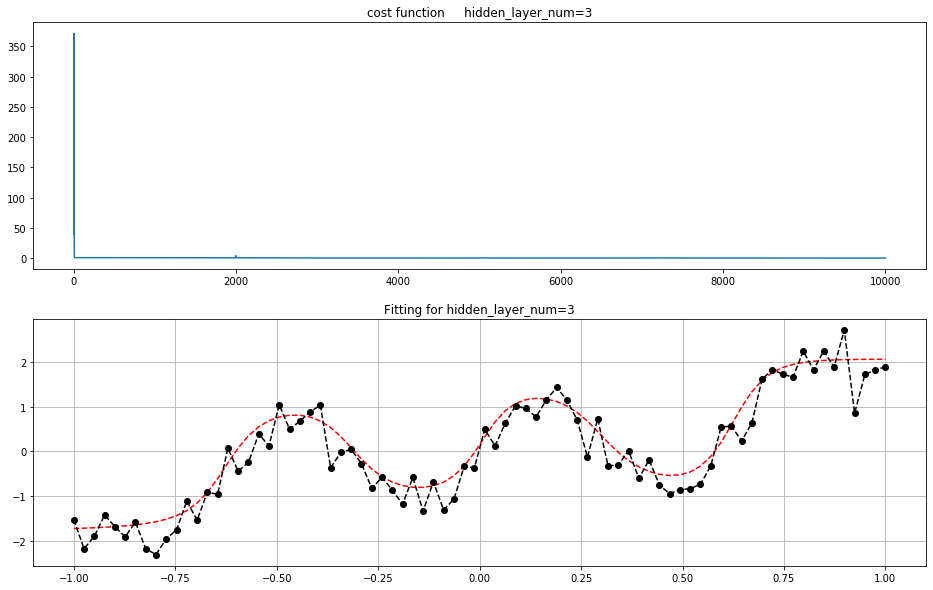

In [26]:
%%time
plt.figure(figsize=(16,10))
print("The last lost function is ",J_2[-1])

plt.subplot(211)
plt.plot(Jx_2,J_2)
plt.title("cost function"+"     "+"hidden_layer_num=3")

plt.subplot(212)
plt.title("Fitting for hidden_layer_num=3")
plt.plot(X_test,a_out_2,'r--')
plt.plot(X_test,Y_test,'k--o')
plt.grid(True)

由测试结果可见对于训练的算法拟合该函数还是有点困难

#### 用normal equation进行测试

In [39]:
#测试
y_prediction_test_Norm=prediction(X_test,Theta_train_Norm)
MSE_test_Norm=MSE(Y_test,y_prediction_test_Norm)


test mse: 0.652337


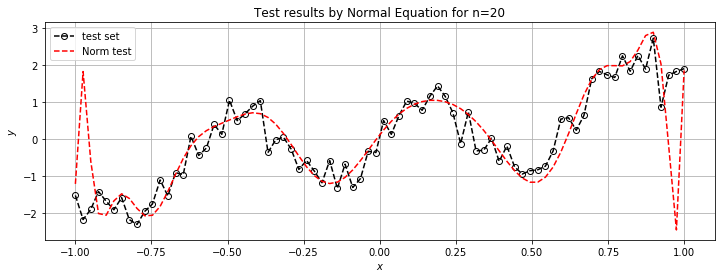

In [43]:
print("test mse:",'{:.6f}'.format(MSE_test_Norm))
plt.figure(figsize=(12,4))

plt.plot(X_test,Y_test,'k--o',markerfacecolor='none',label='test set');  #画经过扰动的测试集
plt.plot(X_test,y_prediction_test_Norm,'r--',label='Norm test'); #画测试集预测结果
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');
plt.title("Test results by Normal Equation for n="+str_n);
plt.legend(loc='best')
plt.grid(True)

由上图可见，除了在头尾处有偏差，在中间部分的拟合效果还不错。